# Topics

## 1. Fourier Descriptor 
###     i)   DFT on 1D Outline 
###     ii)  The Importance of the Order 
## 2. Contour Plots
###     i) Contour Plots
###     ii) The Extraction of Coordinates of Contour Points 
## 3. Back to Fourier Descriptor 
###     i) Order-by-order  
###     ii) Invariance (location, size, rotation)  
## 4. Toward Character Recognition ("OCR" --> Computer Vision) 
 


In [1]:
a = 1.
b = 2.
# It's not c = a + b*j!!
c = a + b*1j

print c

(1+2j)


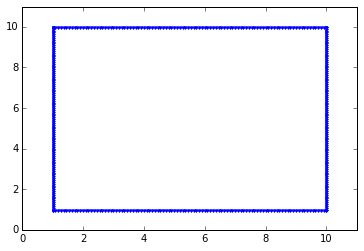

In [2]:
%matplotlib inline
'''Generating a square'''


import numpy as np
import matplotlib.pyplot as plt

num_pts = 100
sz = 10


x1 = np.linspace(1, sz, num_pts)
x2 = np.ones(num_pts)*sz
x3 = np.linspace(sz, 1, num_pts)
x4 = np.ones(num_pts)
x = np.concatenate((x1, x2, x3, x4))

y1 = np.ones(num_pts)
y2 = np.linspace(1, sz, num_pts)
y3 = np.ones(num_pts)*sz
y4 = np.linspace(sz, 1, num_pts)
y = np.concatenate((y1, y2, y3, y4))


plt.plot(x, y, 'b.')
plt.axis([0, sz + 1, 0, sz + 1])
plt.show()

## Fourier Descriptor (FD): FT of z = x + 1j\*y, where x and y are the coordinates of the outline of a shape.


Nyquist index 200
Note: I'm take the same number of component from the low and high ends: 10 10


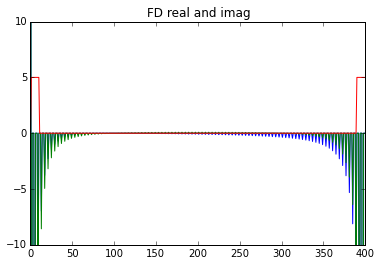

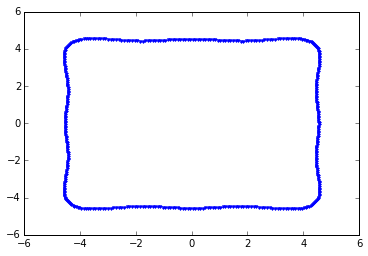

In [3]:
%matplotlib inline

'''

Fourier Descriptor (FD): FT of (x + 1j*y), where x and y are the coordinates 
of the outline of a shape.


Below: I reject the 0th FT term -- why?

'''


import numpy as np
N = len(x)
n = np.arange(N)


z = x + y*1j #complex coordinate

Z = np.fft.fft(z)

plt.figure()
plt.title('FD real and imag')
plt.plot(Z.real, 'b-')
plt.plot(Z.imag, 'g-')
plt.ylim([-10, 10])


# Setting up filters

n = np.arange(len(x))
print 'Nyquist index', N/2

n_keep = 10
# low freq: low n terms
filt1 = (n > 0)*(n <= n_keep)  
# low freq: high n terms
filt2 = (n > ((N-1) - n_keep))
print "Note: I'm take the same number of component from the low and high ends:", \
      filt1.sum(), filt2.sum()

# low freq: both low and high n terms   
filt = filt1 + filt2

# Note: 1. How few components are needed to recover the basic shape
#       2. How I approach symmetrically from both ends, since the highest freq (Nyquist freq)
#          is in the middle.
plt.plot( filt*5, 'r-' )

plt.show()


# Recovery -- with and without low-pass filter
# A *lot* of fourier components go into get the sharp corners right!  
# (Get those right require high freq terms; but they are not necessary for pattern recognition.)

Z *= filt
z_rec = np.fft.ifft(Z)

x_rec = z_rec.real
y_rec = z_rec.imag

plt.plot(x_rec, y_rec, 'b.')
plt.show()



## Breakout1: Write the following 2 useful functions:

### 1. FD(x, y, plot_FD = False, y_lim = None) 
###     - if plot_FD is True, plot the real and imaginary parts of FD on the same figure.
###     - if y_lim is None, autoscale. If it's specified, then set the verticle scale to be between -y_lim and +y_lim.
###     - returns Z, i.e., the FD's.

### 2. filt_FD(Z, n_keep, no_zeroth = True) 
###     - should have the option of including the zeroth order term in Z.
###     - returns Z\*filt.  The truth table of filt depends on n_keep, of course.



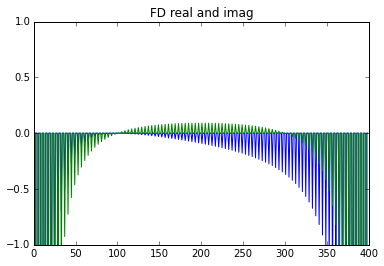

In [4]:
def FD(x, y, plot_FD = False, y_lim = None):
    import numpy as np
    N = len(x)
    n = np.arange(N)
    
    z = x + y*1j
    Z = np.fft.fft(z)
    
    if plot_FD == False:
        return Z
    
    plt.figure()
    plt.title('FD real and imag')
    plt.plot(Z.real, 'b-')
    plt.plot(Z.imag, 'g-')
    
    if y_lim != None:
        plt.ylim([-y_lim, y_lim])
        
    return Z
    
def filt_FD(Z, n_keep, no_zeroth = True):
    
    if no_zeroth == False:
        filt0 = 1
    else:
        filt0 = n > 0 
        
    filt1 = filt0*(n <= n_keep)
    # low freq: high n terms
    filt2 = (n > ((N-1) - n_keep))
  
    filt = filt1 + filt2
    
    Z *= filt
    z_rec = np.fft.ifft(Z)

    x_rec = z_rec.real
    y_rec = z_rec.imag

    return Z*filt


Z = FD(x, y, plot_FD = True, y_lim = 1)
ZZ = filt_FD(Z, 10, no_zeroth = False)
ZZZ = filt_FD(Z, 10, no_zeroth = True)


In [5]:
%matplotlib inline

'''
Breakout1 Solution

Useful functions

'''
import numpy as np
import matplotlib.pyplot as plt


def FD(x, y, plot_FD = False, y_lim = None):

    N = len(x)
    n = np.arange(N)


    z = x + y*1j

    Z = np.fft.fft(z)

    if plot_FD:
        plt.figure()
        plt.title('FD real and imag')
        plt.plot(Z.real, 'b-')
        plt.plot(Z.imag, 'g-')
        if y_lim != None:
            plt.ylim([-y_lim, y_lim])

    return Z

# Setting up filters

def filt_FD(Z, n_keep, no_zeroth = True):
    N = len(Z)
    n = np.arange(len(Z))
    print 'Nyquist index', N/2
    # in case I want the centroid position.
    filt0 = n > 0 if no_zeroth else 1
    filt1 = filt0*(n <= n_keep)
    
    filt2 = (n > ((N-1) - n_keep))
    print 'Number of components from both sides:', filt1.sum(), filt2.sum()
    filt = filt1 + filt2
    #print Z.real[N/2]
    return Z*filt

# I'm giving away the following 2 functions for free!
def recover_shape(Z):
    z_rec = np.fft.ifft(Z)

    x_rec = z_rec.real
    y_rec = z_rec.imag
    
    return x_rec, y_rec


def plot_shape(x, y, plot_style = 'b.'):
    fig, ax = plt.subplots()
    ax.set_title('Recovered Shape')
    try:
        xlen = len(x)
    except:
        ax.plot(x, y, plot_style)
    else:
        for i in range(xlen):
            ax.plot(x[i], y[i], plot_style)




Nyquist index 200
Number of components from both sides: 10 10


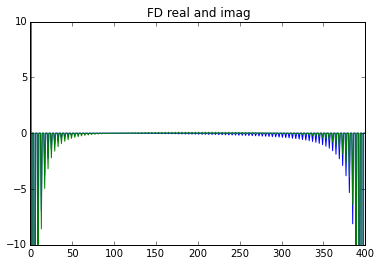

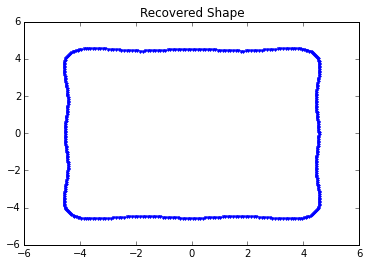

In [6]:
'''

Check to see if the functinos in breakout1 work.

To emphasize:

- 0th order: average (or sum, depending on DFT convention adopted) of all points


'''
#************************************Main Program*************************************
# Note: this is how most programs should be written.
Z = FD(x, y, plot_FD=True, y_lim = 10)
Z_filt = filt_FD(Z, 10)
x_rec, y_rec = recover_shape(Z_filt)
plot_shape(x_rec, y_rec)


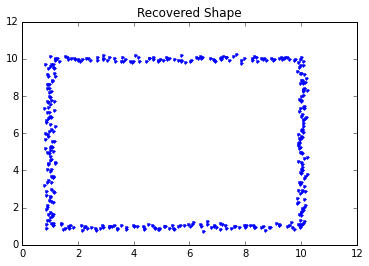

In [7]:
%matplotlib inline
'''Noise added'''


import numpy as np
import matplotlib.pyplot as plt

num_pts = 100
sz = 10
noiz_sz = 0.1

x1 = np.linspace(1, sz, num_pts)
x2 = np.ones(num_pts)*sz
x3 = np.linspace(sz, 1, num_pts)
x4 = np.ones(num_pts)
x = np.concatenate((x1, x2, x3, x4))
x += np.random.randn(len(x))*noiz_sz #add noise



y1 = np.ones(num_pts)
y2 = np.linspace(1, sz, num_pts)
y3 = np.ones(num_pts)*sz
y4 = np.linspace(sz, 1, num_pts)
y = np.concatenate((y1, y2, y3, y4))
y += np.random.randn(len(y))*noiz_sz


plot_shape(x, y)



Nyquist index 200
Number of components from both sides: 10 10


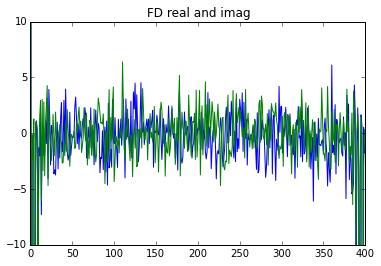

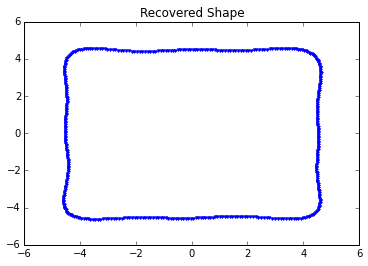

In [8]:
Z = FD(x, y, plot_FD=True, y_lim = 10)
Z_filt = filt_FD(Z, 10)
x_rec, y_rec = recover_shape(Z_filt)
plot_shape(x_rec, y_rec)

#fourier descriptor not affected by noise

## The Order of the Points Matters

In [9]:
%matplotlib inline
'''

Two Purposes:

1. Introduce the idea of an edge detector.
2. Show the order of points matters a great deal.


'''


import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature


# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

# rotation
#im = ndi.rotate(im, 15, mode='constant')
# Gaussian smoothing
im = ndi.gaussian_filter(im, 4)
# Add noise
im += 0.1*np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges = feature.canny(im, sigma=3)

# display results -- creating figure and subplots at the same time.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.jet)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)


ax2.imshow(edges, cmap=plt.cm.gray, interpolation='none')
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                    bottom=0.02, left=0.02, right=0.98)

plt.show()

ImportError: No module named skimage

In [ ]:
print edges.shape, edges.dtype

In [ ]:
%matplotlib inline
'''Converting edge image to arrays'''


import numpy as np
import matplotlib.pyplot as plt
x_arr = []
y_arr = []

for i in range(edges.shape[0]):
    for j in range(edges.shape[1]):
        if edges[i, j] > 0:
            x_arr.append(i)
            y_arr.append(j)

x_arr = np.array(x_arr)
y_arr = np.array(y_arr)
plt.plot(x_arr, y_arr, 'k.')

plt.show()

In [ ]:
Z = FD(x_arr, y_arr, plot_FD=True, y_lim = 1000)
Z_filt = filt_FD(Z, 10)
x_rec, y_rec = recover_shape(Z_filt)
plot_shape(x_rec, y_rec)

# Uh oh, what's going on????


In [ ]:
'''

Order the points in polar coordinates so that they are sequential.

Note the usage of arctan2() again.

'''

import numpy as np
import matplotlib.patches as patches

pts = zip(x_arr, y_arr)
# compute centroid
cent=(sum([p[0] for p in pts])/len(pts),sum([p[1] for p in pts])/len(pts))
# sort by polar angle
pts.sort(key=lambda p: np.arctan2(p[1]-cent[1],p[0]-cent[0]))

x = np.array([p[0] for p in pts])
y = np.array([p[1] for p in pts])

# plot points
plt.scatter(x, y)
plt.show()

In [ ]:
%matplotlib inline

'''
With points in the right order, all is right.

'''

Z = FD(x, y, plot_FD=True, y_lim = 1000)
Z_filt = filt_FD(Z, 5)
x_rec, y_rec = recover_shape(Z_filt)
plot_shape(x_rec, y_rec)



## Use Contour Plots 
## (The points are always arranged in the right order)

In [ ]:
%matplotlib inline
'''


To get the order of the points right the first time: Using contours.

- Advantage: Get the order right and can deal with concave polygons and polygons with holes 
  very easily (compared with edge detector)
- Disadvantage: Harder to deal with a noisy image (compared with edge detector)
- For OCR with hi-def images, no problem -- for more sophisticated OCR techniques, 
  next semester!


'''


import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage import feature




plt.figure()
plt.imshow(im, cmap=plt.cm.gray)
plt.title('The Image')

# Note: by convention, in this case, y values comes from the 0th index.
# Otherwise one has to transpose the image and the contour will appear sideways 
# (no an issue here since it's a square).
x = np.arange(im.shape[1]) #x needs to be FIRST to get right orientation
y = np.arange(im.shape[0])
# make 2D coordinate grid 
X, Y = np.meshgrid(x, y)

# Find and plot contours
plt.figure()
# Note the peculiarity of needing the transpose operation.
plt.title('Contour')
CS = plt.contour(X, Y, im, 1) #only wants one contour
levels = CS.levels
print 'contour level', levels

# Find the (x, y) coodinates of the contour lines.
cs_paths = CS.collections[0].get_paths()

print 'number of contour path', len(cs_paths)
p = cs_paths[0]
v = p.vertices
x_arr = v[:,0] #x coordinates
y_arr = v[:,1] #y coordinates

plt.figure()
plt.title("Verify the contour points are correct")
plt.scatter(x_arr, y_arr)

plt.show()


## A More Interesting Example: The Letter "E"

In [ ]:
%matplotlib inline
'''

Use the letter "E" as the example case.

Given an image of a letter, the code below will find it's shape (complext) vector 
by using contour.


'''

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage import feature


im = mpimg.imread('letterE.jpg')

# Take only one of RGB channels
im = im[:, :, 0]


plt.figure()
plt.imshow(im, cmap=plt.cm.gray)
plt.title('The Image')

x = np.arange(im.shape[1])
y = np.arange(im.shape[0])
# make 2D coordinate grid 
X, Y = np.meshgrid(x, y)

# Find and plot contours
plt.figure()
# Note the peculiarity of needing the transpose operation.
# The contour appear sideways because the transpose.
plt.title('Contour')
CS = plt.contour(X, Y, im, 1)
levels = CS.levels
print 'contour level', levels

# Find the (x, y) coodinates of the contour lines.
cs_paths = CS.collections[0].get_paths()

print 'number of contour path', len(cs_paths)
p = cs_paths[0]
v = p.vertices
x = v[:,0]
y = v[:,1]

plt.figure()
plt.title("Verify the contour points are correct")
plt.scatter(x, y)

plt.show()


In [ ]:
Z = FD(x, y, plot_FD=True, y_lim = 1000)

# Let's see how order = 5 will do, and how about 10?
# Note: the Nyquist index is 1258, and yet we've only gone up to n = 10!
# Put it another way: there are 1258*2 pairs of (x, y) in the contour, but it turns out
# we only need 10*2*2 (remember each FD is a complex number), or 40 numbers to capture 
# the essence of the shape!
order = 10 #number of terms you keep on both sides
Z_filt = filt_FD(Z, order)
x_rec, y_rec = recover_shape(Z_filt)
plot_shape(x_rec, y_rec)


##  Breakout 2: Write a function extract_shape_v0(im_file, blowup = 1.0, plot_img = False, plot_contour = False, plot_contour_pts = False) 

### - returns the x and y arrays of the outline (contour) of the shape.

### - should check whether the image has a single and mutliple channels.  If the later, take the 0th (usu. R) channels

### - should have the ability of blowing up the image by a factor specified by blowup.



In [ ]:
'''
Breakout2 Solution

'''

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage import feature


def extract_shape_v0(im_file, blowup = 1., plot_img = False, plot_contour = False, plot_contour_pts = False):

    
    im = mpimg.imread(im_file)
    # Take one of RGB(A) channels
    if len(im.shape) > 2:
        im = im[:, :, 0]
    
    if plot_img:
        plt.figure()
        plt.title('Original Shape')
        plt.imshow(im, cmap = plt.cm.gray)

    # Note: by convention, in this case, y values comes from the 0th index.
    # Otherwise one has to transpose the image and the contour will appear sideways 
    x = np.arange(im.shape[1])*blowup  
    y = np.arange(im.shape[0])*blowup
    
    # Have to flip y to get the orientation right, again just a peculiar convention we have to work around
    # Note the [::] notation: a[3:20:2] means from the 3rd element to the 20th element, choose every 2nd element.
    y = y[::-1]

    # In case I want to shift x.
    #x_shift = 200
    #x += x_shift

    X, Y = np.meshgrid(x, y)
    
    plt.figure()
    plt.title('Contours')
    # Note the dimensions of x and y may NOT the same, thus the necessity of the 
    # tranpose operation (an oddity, I admit...)
    CS = plt.contour(X, Y, im, 1)
    levels = CS.levels
    print 'contour level', levels
    if not plot_contour:
        plt.close()

    cs_paths = CS.collections[0].get_paths()

    print 'number of contour path', len(cs_paths)

    p = cs_paths[0]
    v = p.vertices
    x_arr = v[:,0]
    y_arr = v[:,1]

    if plot_contour_pts:
        plt.figure()
        plt.title("Verify the contour points are correct")
        plt.scatter(x_arr, y_arr)

    return x_arr, y_arr

## The Meaning of the Terms in FD -- Order by Order

### The descriptors Z[k] (Fourier Desriptors, or FD's) are components of a shape in frequency space (or more precisely, "k-space"): Components with low k provides low frequency information -- an approximation to the shape, and components with higher frequencies provide details.

### 1. Translational Invariance.  For k = 0, Z[k] represents the position of the center of gravity of the shape. This term is not interesting for the shape description. Without this term, the description won't be affected by a translation of the shape.  



### 2. Size Invariance.  The first frequency component, Z[k] for k = 1 (more precisely, the first and last terms), describes the size of the shape. If all the other components are set to zero, the shape becomes an ellipse (actually, a N-sided polygon).  The product of the first and last terms -- Z[1] and Z[-1] in Python notation -- is related the area of the ellipse (basically area = pi\*a\*b -- you can think of the these two terms as being related to the major and minor axes of an ellipse).  One can use this component to normalize the other Fourier descriptors.  This way, two identical shapes, but with different sizes, can recognized as such.  To the first order (literally!):  all enclosed shapes are ellipses with the major and minor axes determined by the aspect ratio and the overall size of the shape)



### 3. Convavity.  The seond frequency components, Z[2] and Z[-2], together show which way the shape bends ("concavity").



### 4. The other frequency components will make higher frequency alterations.  



### 5. The phase of Z[k] describes the place where the higher order corrections are applied -- just like in linear FT, the phase in sin/cos will affect where the corrections will be applied.  

### 6. Rotational Invariance.  Related to \#5, multiplying Z[k] by an additional phase factor amounts to rotating the shape.  This means |Z[k]|'s are the same whichever the orientation of the shape may be.


(Adapted from http://www.tsi.telecom-paristech.fr/pages/enseignement/ressources/beti/descript_fourier/Part1.htmlf)

In [ ]:
'''
1. Translational Invariance Example
'''

x, y = extract_shape_v0('letterE.jpg')
Z = FD(x, y, plot_FD=True, y_lim = 1000)

order = 10
# Observe the effects of whether or not we include the zeroth order term.
Z_filt = filt_FD(Z, order)
Z_filt = filt_FD(Z, order, no_zeroth=False)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x, y)
plt.plot(x_rec, y_rec)
plt.show()


In [ ]:
'''
2. Size Invariance

- without normalization
'''

x_L, y_L = extract_shape_v0('letterE.jpg', blowup = 10.)
Z = FD(x_L, y_L, plot_FD=True, y_lim = 1000)

order = 10
Z_filt = filt_FD(Z, order)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x_L, y_L)
plt.plot(x_rec, y_rec)
plt.show()


In [ ]:
'''
2. Size Invariance

Comparing two E's with very different sizes: Without and with normalization. 
'''

def size_norm(Z):
    return Z/np.sqrt( np.abs(Z[1])*np.abs(Z[-1]) )

x_L, y_L = extract_shape_v0('letterE.jpg', blowup = 10.)
Z = FD(x_L, y_L)

order = 10
Z_filt = filt_FD(Z, order)
#normalization
Z_filt = size_norm(Z_filt)
x_L_rec, y_L_rec = recover_shape(Z_filt)


x, y = extract_shape_v0('letterE.jpg', blowup = 1.)
Z = FD(x, y)

order = 10
Z_filt = filt_FD(Z, order)
# normalization
Z_filt = size_norm(Z_filt)
x_rec, y_rec = recover_shape(Z_filt)


plt.figure()
plt.plot(x_rec, y_rec, 'gx')   # after normalization, use 'gx' as plot symbol
plt.plot(x_L_rec, y_L_rec, 'b-', lw = 2)
plt.show()


In [ ]:
'''
3. Concavity (and the beginning of "order-by-order")

- 0th: Centroid
- 1st: Size
- 2nd: Convavity.

'''

x, y = extract_shape_v0('letterE.jpg')
Z = FD(x, y)

order = 0
Z_filt = filt_FD(Z, order, no_zeroth=False)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x, y)
plt.plot(x_rec, y_rec, 'gx')
plt.show()

order = 1
Z_filt = filt_FD(Z, order, no_zeroth=False)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x, y)
plt.plot(x_rec, y_rec, 'g.')
plt.show()

order = 2
Z_filt = filt_FD(Z, order, no_zeroth=False)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x, y)
plt.plot(x_rec, y_rec, 'g.')
plt.show()





In [ ]:
'''
4. Higher Order Terms (and the continuation of "order-by-order")

'''


order = 5
Z_filt = filt_FD(Z, order, no_zeroth=False)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x, y)
plt.plot(x_rec, y_rec, 'g.')
plt.show()

order = 10
Z_filt = filt_FD(Z, order, no_zeroth=False)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x, y)
plt.plot(x_rec, y_rec, 'g.')
plt.show()


In [ ]:
'''
Rotational Invariance.

Multiplying Z[k] by an additional phase factor amounts to rotating the shape. 

'''


x, y = extract_shape_v0('letterE.jpg')
# rotate shape in configuration space
z = x + 1j*y
z *= np.exp(1j*np.pi/3.)

x_pr, y_pr = z.real, z.imag

Z_pr = FD(x_pr, y_pr)


order = 10
Z_filt = filt_FD(Z_pr, order)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x_pr, y_pr)
plt.plot(x_rec, y_rec, 'gx')
plt.show()


In [ ]:
'''
Rotational Invariance.

Multiplying Z[k] by an additional phase factor amounts to rotating the shape...
the two shapes, though identical, would have different FD's.


'''


x, y = extract_shape_v0('letterE.jpg')

order = 10

Z = FD(x, y)
Z_filt = filt_FD(Z, order)
Z_filt = size_norm(Z_filt)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x_rec, y_rec)


# rotate shape in configuration space
z = x + 1j*y
z *= np.exp(1j*np.pi/3.)
x_pr, y_pr = z.real, z.imag
Z_pr = FD(x_pr, y_pr)

Z_filt_pr = filt_FD(Z_pr, order)
Z_filt_pr = size_norm(Z_filt_pr)

x_rec, y_rec = recover_shape(Z_filt_pr)
plt.plot(x_rec, y_rec)
plt.show()

# Clearly the FD would be different for the two E's.
plt.figure()
plt.title("10 size-normalized FD's for 2 E's with Different Orientations")
plt.plot(Z_filt.real, Z_filt_pr.real, 'r.')
plt.plot(Z_filt.imag, Z_filt_pr.imag, 'yx')
plt.show()

In [ ]:
'''
Rotational Invariance.

Multiplying Z[k] by an additional phase factor amounts to rotating the shape...
This means |Z[k]|'s are the same whichever the orientation of the shape may be.

'''


x, y = extract_shape_v0('letterE.jpg')

order = 10

Z = FD(x, y)
Z_filt = filt_FD(Z, order)
Z_filt = size_norm(Z_filt)
x_rec, y_rec = recover_shape(Z_filt)
plt.figure()
plt.plot(x_rec, y_rec)


# rotate shape in configuration space
z = x + 1j*y
z *= np.exp(1j*np.pi/3.)
x_pr, y_pr = z.real, z.imag
Z_pr = FD(x_pr, y_pr)

Z_filt_pr = filt_FD(Z_pr, order)
Z_filt_pr = size_norm(Z_filt_pr)

x_rec, y_rec = recover_shape(Z_filt_pr)
plt.plot(x_rec, y_rec)
plt.show()

# But the |FD| are the same.  We thus have achieved rotational invariance!
plt.figure()
plt.title("10 size-normalized FD's for 2 E's with Different Orientations")
plt.plot(np.abs(Z_filt), np.abs(Z_filt_pr), 'r.')
plt.show()

## Breakout 3 
## Write a function get_FD_abs(x, y, order = 10, norm = True, no_zeroth = True)

### - returns fd_mag, x_rec, y_rec

In [ ]:
def get_FD_abs(x, y, order = 10, norm = True, no_zeroth = True):
    return fd_mag, x_rec, y_rec

In [ ]:
'''
Breakout 3 Solution
'''

def get_FD_abs(x, y, order = 10, norm = True, no_zeroth = True):
    '''Finds the Fourier Descriptors and the recovered x and y for a shape.'''
    Z = FD(x, y)
    print 'len(Z)', len(Z)

    Z_filt = filt_FD(Z, order, no_zeroth=no_zeroth)
    if norm:
        Z_filt = size_norm(Z_filt)
    print 'len(Z_filt)', len(Z_filt)
    x_rec, y_rec = recover_shape(Z_filt)

    # throw away zero terms
    fd_mag = np.abs(Z_filt[Z_filt != 0])
#     fd_mag = fd_mag[fd_mag > 0]
    
    return fd_mag, x_rec, y_rec

order = 10
no_zeroth = True

x, y = extract_shape_v0('letterE.jpg')
fd, x_rec, y_rec = get_FD_abs(x, y, order = order, norm = False, no_zeroth = True)

plt.figure()
plt.plot(x_rec, y_rec, 'b')

plt.figure()
plt.plot(np.arange(2, 2*order), fd[1:-1], 'bo') 
#zeroth term is center of mass
#first and last term provides size
    
plt.show()

## What's All This Good for??
## Shape recognition regardless of location, size or orientation!
## ...the beginning of computer vision!

In [ ]:
'''To tell E from H'''

order = 10

def get_FD_abs(x, y, order = 10):
    '''Finds the Fourier Descriptors and the recovered x and y for a shape.'''
    Z = FD(x, y)
    print 'len(Z)', len(Z)

    Z_filt = filt_FD(Z, order)
    Z_filt = size_norm(Z_filt)
    print 'len(Z_filt)', len(Z_filt)
    x_rec, y_rec = recover_shape(Z_filt)

    # throw away zero terms
    fd_mag = np.abs(Z_filt[Z_filt != 0])
    
    return fd_mag, x_rec, y_rec

x, y = extract_shape_v0('letterE.jpg')
fd_E, x_rec_E, y_rec_E = get_FD_abs(x, y, order = order)

x, y = extract_shape_v0('letterH.jpg')
fd_H, x_rec_H, y_rec_H = get_FD_abs(x, y, order = order)


plt.figure()
plt.plot(x_rec_E, y_rec_E)
plt.figure()
plt.plot(x_rec_H, y_rec_H)

plt.figure()
plt.plot(np.arange(2, 2*order), fd_E[1:-1], 'gx')
plt.plot(np.arange(2, 2*order), fd_G[1:-1], 'bo')
plt.axis([0, 2*order + 2, -0.5, 3])
plt.show()

print len(fd_G), len(fd_E)

# # Short Breakout: Find out whatsthis.png is by looking at its reconstruction from 5, 10, 15, 20, 25, 30, 100, 1000 FD's

In [ ]:
x, y = extract_shape_v0('whatsthis.png')
fd, x_rec, y_rec = get_FD_abs(x, y, order = 1000)

plt.figure()
plt.plot(x_rec, y_rec)
plt.show()

## End of week 12, Lecture 1

In [ ]:
'''
Toward HW07 Solution
'''

def get_FD_abs(x, y, order = 10, norm = True, no_zeroth = True):
    '''Finds the Fourier Descriptors and the recovered x and y for a shape.'''
    Z = FD(x, y)
    print 'len(Z)', len(Z)

    Z_filt = filt_FD(Z, order, no_zeroth=no_zeroth)
    if norm:
        Z_filt = size_norm(Z_filt)
    print 'len(Z_filt)', len(Z_filt)
    x_rec, y_rec = recover_shape(Z_filt)

    # throw away zero terms
    fd_mag = np.abs(Z_filt[Z_filt != 0])
#     fd_mag = fd_mag[fd_mag > 0]
    
    return fd_mag, x_rec, y_rec

order = 10
no_zeroth = False

x1, y1 = extract_shape('number1.png')
fd1 = []
x_rec1 = []
y_rec1 = []
for i in range(len(x1)):
    fd, x_rec, y_rec = get_FD_abs(x1[i], y1[i], order = order, norm = False, no_zeroth = no_zeroth)
    fd1.append(fd)
    x_rec1.append(x_rec)
    y_rec1.append(y_rec)


x2, y2 = extract_shape('number2.png')
fd2 = []
x_rec2 = []
y_rec2 = []
for i in range(len(x2)):
    fd, x_rec, y_rec = get_FD_abs(x2[i], y2[i], order = order, norm = False, no_zeroth = no_zeroth)
    fd2.append(fd)
    x_rec2.append(x_rec)
    y_rec2.append(y_rec)

    
x6, y6 = extract_shape('number6.png')
fd6 = []
x_rec6 = []
y_rec6 = []
for i in range(len(x6)):
    fd, x_rec, y_rec = get_FD_abs(x6[i], y6[i], order = order, norm = False, no_zeroth = no_zeroth)
    fd6.append(fd)
    x_rec6.append(x_rec)
    y_rec6.append(y_rec)


plt.figure()
for i in range(len(x1)):
    plt.plot(x_rec1[i], y_rec1[i], 'b')
for i in range(len(x2)):
    plt.plot(x_rec2[i], y_rec2[i], 'g')
for i in range(len(x6)):
    plt.plot(x_rec6[i], y_rec6[i], 'r')

start_idx = 1 if no_zeroth else 2

plt.figure()
for i in range(len(x1)):
    plt.plot(np.arange(2, 2*order), fd1[i][start_idx:-1], 'bo')
for i in range(len(x2)):
    plt.plot(np.arange(2, 2*order), fd2[i][start_idx:-1], 'gx')
for i in range(len(x6)):
    plt.plot(np.arange(2, 2*order), fd6[i][start_idx:-1], 'r8')

    
plt.show()

contour level [ 0.5]
contour level [ 0.5]
number of contour path 1
len(Z) 437
Nyquist index 218
Number of components from both sides: 11 10
len(Z_filt) 437
contour level [ 0.5]
contour level [ 0.5]
number of contour path 1
len(Z) 817
Nyquist index 408
Number of components from both sides: 11 10
len(Z_filt) 817
contour level [ 0.5]
contour level [ 0.5]
number of contour path 2
len(Z) 709
Nyquist index 354
Number of components from both sides: 11 10
len(Z_filt) 709
len(Z) 243
Nyquist index 121
Number of components from both sides: 11 10
len(Z_filt) 243


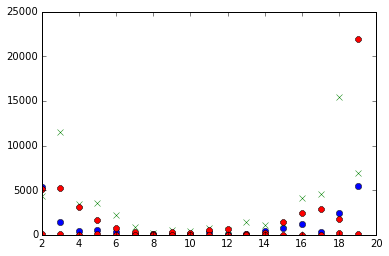

In [12]:
'''

HW07 Solution

'''


import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage import feature

def FD(x, y, plot_FD = False, y_lim = None):

    N = len(x)
    n = np.arange(N)


    z = x + y*1j

    Z = np.fft.fft(z)

    if plot_FD:
        plt.figure()
        plt.title('FD real and imag')
        plt.plot(Z.real, 'b-')
        plt.plot(Z.imag, 'g-')
        if y_lim != None:
            plt.ylim([-y_lim, y_lim])

    return Z

# Setting up filters

def filt_FD(Z, n_keep, no_zeroth = True):
    N = len(Z)
    n = np.arange(len(Z))
    print 'Nyquist index', N/2
    # in case I want the centroid position.
    filt0 = n > 0 if no_zeroth else 1
    filt1 = filt0*(n <= n_keep)
    
    filt2 = (n > ((N-1) - n_keep))
    print 'Number of components from both sides:', filt1.sum(), filt2.sum()
    filt = filt1 + filt2
    #print Z.real[N/2]
    return Z*filt
    
def recover_shape(Z):
    z_rec = np.fft.ifft(Z)

    x_rec = z_rec.real
    y_rec = z_rec.imag
    
    return x_rec, y_rec


def plot_shape(x, y, plot_style = 'b.'):
    fig, ax = plt.subplots()
    ax.set_title('Recovered Shape')
    try:
        xlen = len(x)
    except:
        ax.plot(x, y, plot_style)
    else:
        for i in range(xlen):
            ax.plot(x[i], y[i], plot_style)


def extract_shape(im_file, blowup = 1., plot_img = False, plot_contour = False, plot_contour_pts = False):

    im = mpimg.imread(im_file)
    # Take one of RGB(A) channels
    if len(im.shape) > 2:
        im = im[:, :, 0]

    # To remove border -- which sometimes annoyingly are valued at 1.
    im = im[2:-2, 2:-2]
        
    if plot_img:
        plt.figure()
        plt.title('Original Shape')
        plt.imshow(im, cmap = plt.cm.gray)

    x = np.arange(im.shape[0])
    y = np.arange(im.shape[1])

    X, Y = np.meshgrid(x, y)

    plt.figure()
    plt.title('Contours')
    # Note the dimensions of x and y may NOT the same, thus the necessity of the 
    # tranpose operation (an oddity, I admit...)
    CS = plt.contour(X, Y, im.T, 1)
    levels = CS.levels
    print 'contour level', levels
    print 'contour level', levels
    if not plot_contour:
        plt.close()
    
    cs_paths = CS.collections[0].get_paths()

    print 'number of contour path', len(cs_paths)

    x_arr = []
    y_arr = []
    for p in cs_paths:
        v = p.vertices
        x_arr.append(v[:,0])
        y_arr.append(v[:,1])

    if plot_contour_pts: 
        plt.figure()
        plt.title("Verify the contour points are correct")
        for i in range(len(x_arr)):
            plt.scatter(x_arr[i], y_arr[i])

    return x_arr, y_arr 

def get_FD_abs(x, y, order = 10, norm = True, no_zeroth = True):
    '''Finds the Fourier Descriptors and the recovered x and y for a shape.'''
    fd_mag = []
    x_rec = []
    y_rec = []
    for i in range(len(x)):
        Z = FD(x[i], y[i])
        print 'len(Z)', len(Z)

        Z_filt = filt_FD(Z, order, no_zeroth = no_zeroth)
        if norm:
            Z_filt = size_norm(Z_filt)
        print 'len(Z_filt)', len(Z_filt)
        xy_rec = recover_shape(Z_filt)
        x_rec.append(xy_rec[0])
        y_rec.append(xy_rec[1])
        
        # throw away zero terms
        fd_mag.append( np.abs(Z_filt[Z_filt != 0]) )
    
    return fd_mag, x_rec, y_rec


def size_norm(Z):
    return Z/np.sqrt( np.abs(Z[1])*np.abs(Z[-1]) )


order = 10
no_zeroth = False
start_idx = 1 if no_zeroth else 2


x1, y1 = extract_shape('number1.png')
fd1, x_rec1, y_rec1 = get_FD_abs(x1, y1, order = order, no_zeroth = no_zeroth, norm = False)
x2, y2 = extract_shape('number2.png')
fd2, x_rec2, y_rec2 = get_FD_abs(x2, y2, order = order, no_zeroth = no_zeroth, norm = False)
x6, y6 = extract_shape('number6.png')
fd6, x_rec6, y_rec6 = get_FD_abs(x6, y6, order = order, no_zeroth = no_zeroth, norm = False)

plt.figure()
for i in range(len(x1)):
    plt.plot(x_rec1[i], y_rec1[i])
for i in range(len(x2)):
    plt.plot(x_rec2[i], y_rec2[i])
for i in range(len(x6)):
    plt.plot(x_rec6[i], y_rec6[i])


plt.figure()
for i in range(len(x1)):
    plt.plot(np.arange(2, 2*order), fd1[i][start_idx:-1], 'bo')
for i in range(len(x2)):
    plt.plot(np.arange(2, 2*order), fd2[i][start_idx:-1], 'gx')
for i in range(len(x6)):
    plt.plot(np.arange(2, 2*order), fd6[i][start_idx:-1], 'r8')

    
plt.show()


In [ ]:


import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage import feature

def extract_shape(im_file, blowup = 1., plot_img = False, plot_contour = False, plot_contour_pts = False):

    im = mpimg.imread(im_file)
    # Take one of RGB(A) channels
    if len(im.shape) > 2:
        im = im[:, :, 0]

    # To remove border -- which sometimes annoyingly are valued at 1.
    im = im[2:-2, 2:-2]
        
    if plot_img:
        plt.figure()
        plt.title('Original Shape')
        plt.imshow(im, cmap = plt.cm.gray)

    x = np.arange(im.shape[0])
    y = np.arange(im.shape[1])

    X, Y = np.meshgrid(x, y)

    plt.figure()
    plt.title('Contours')
    # Note the dimensions of x and y may NOT the same, thus the necessity of the 
    # tranpose operation (an oddity, I admit...)
    CS = plt.contour(X, Y, im.T, 1)
    levels = CS.levels
    print 'contour level', levels
    print 'contour level', levels
    if not plot_contour:
        plt.close()
    
    cs_paths = CS.collections[0].get_paths()

    print 'number of contour path', len(cs_paths)

    x_arr = []
    y_arr = []
    for p in cs_paths:
        v = p.vertices
        x_arr.append(v[:,0])
        y_arr.append(v[:,1])

    if plot_contour_pts: 
        plt.figure()
        plt.title("Verify the contour points are correct")
        for i in range(len(x_arr)):
            plt.scatter(x_arr[i], y_arr[i])

    return x_arr, y_arr 

## The magnitudes of the 2nd and higher components provide a desription of a shape that is independent of its center, size and orientation -- that is, the essense of "a shape"!


## Plot mag of FD components against FD order, then do leastsq() fit to determine which one is the best fit in the validation set.


## How to deal with B and 8 (and 6 and 9) keep the ratio of the CM??


### It may be possible that if one keeps too few FD components and only keep the magnitudes, two distinct shapes may have identical components (the trivial example would be there will be a very high level of degeneracy if one only keeps the 0th and 1st order components).  But this is highly unlikely if one keeps 10, 20 terms.  Are there mathematical theorems??





## What Is All This Good For??

In [ ]:
%matplotlib inline

Z = FD(x_arr, y_arr, plot_FD=True, y_lim = 1000)
Z_filt = filt_FD(Z, 10)
x_rec, y_rec = recover_shape(Z_filt)

plot_shape(x_rec, y_rec)


In [ ]:
%matplotlib inline
'''


To get the order of the points right the first time: Using contours.

- Advantage: Get the order right and can deal with concave polygons and polygons with holes very easily 
  (compared with edge detector)
- Disadvantage: Harder to deal with a noisy image (compared with edge detector)
- For OCR with hi-def images, no problem -- for more sophisticated OCR techniques, next semester!


'''


import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage import feature



im = mpimg.imread('letterA.jpg')
print im.shape
im = im[:, :, 0]

# idx_nonzero = im > 0
# im[idx_nonzero] = 100.
print im.max(), im.min()

plt.figure()
plt.plot(im)

x = np.arange(im.shape[0])
y = np.arange(im.shape[1])

X, Y = np.meshgrid(x, y)



plt.figure()
CS = plt.contour(X, Y, im, 1)
levels = CS.levels
print 'contour level', levels
#plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')

cs_paths = CS.collections[0].get_paths()

print 'number of contour path', len(cs_paths)

p0 = cs_paths[0]
p1 = cs_paths[1]

print 'len(CS.collections)', len(CS.collections)
v0 = p0.vertices
x_arr0 = v0[:,0]
y_arr0 = v0[:,1]

v1 = p1.vertices
x_arr1 = v1[:,0]
y_arr1 = v1[:,1]

print len(x_arr0), len(x_arr1)

# Compute the Canny filter for two values of sigma
#edges1 = feature.canny(im)
# #edges2 = feature.canny(im, sigma=3)

# # display results
# # fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)
plt.figure()
plt.imshow(im, cmap=plt.cm.jet)
# # ax1.axis('off')
# # ax1.set_title('noisy image', fontsize=20)

#plt.imshow(edges1, cmap=plt.cm.gray)
# # ax2.axis('off')
# # ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

plt.show()

plt.figure()

x_arr = np.concatenate( (x_arr0, x_arr1) )
y_arr = np.concatenate( (y_arr0, y_arr1) )

plt.scatter(x_arr, y_arr)

In [ ]:
from matplotlib import _cntr as cntr


c = cntr.Cntr(X, Y, im)

res = c.trace(150)

# result is a list of arrays of vertices and path codes
# (see docs for matplotlib.path.Path)
nseg = len(res) // 2
segments, codes = res[:nseg], res[nseg:]

print len(segments), type(segments)
print segments[1].shape
plt.plot(segments[1][:, 0], segments[1][:, 1])

In [ ]:
%matplotlib inline


Z0 = FD(x_arr0, y_arr0, plot_FD=True, y_lim = 1000)
Z1 = FD(x_arr1, y_arr1, plot_FD=True, y_lim = 1000)

Z0_filt = filt_FD(Z0, 10)
Z1_filt = filt_FD(Z1, 10)

x_rec0, y_rec0 = recover_shape(Z0_filt)
x_rec1, y_rec1 = recover_shape(Z1_filt)

x_rec = np.concatenate( (x_rec0, x_rec1) )
y_rec = np.concatenate( (y_rec0, y_rec1) )

plot_shape(x_rec, y_rec)


In [ ]:
%matplotlib inline
'''
Note that to get the recovered B right, we have to include the 0th term, because it 
is the position of the centoid.

Wtih A, even with P, we can get away with not using the centroid.

'''
#x_arr, y_arr = extract_shape('Concealed-Mount-Number-1.jpg')
x_arr, y_arr = extract_shape('number3_thin.png')

# import pdb; pdb.set_trace()
# print 'x_arr[0]', x_arr[0]
# print 'y_arr[0]', y_arr[0]


x_rec = []
y_rec = []
Z_sq = []

order = 1

for i in range(len(x_arr)):
    Z = FD(x_arr[i], y_arr[i], plot_FD=True, y_lim = 1000)
    Z_filt = filt_FD(Z, order, no_zeroth=False)
    
    x, y = recover_shape(Z_filt)
    x_rec.append(x)
    y_rec.append(y)
    idx = Z_filt != 0
    plt.figure()
    plt.plot(Z_filt[idx].real)
    plt.plot(Z_filt[idx].imag)
    plt.title('Z real & imaginary')
    
    Z_sq.append(np.abs(Z_filt[idx])**2)

    
    
plot_shape(x_rec, y_rec)

print 'len(Z_sq[0])', len(Z_sq[0])
area = np.sqrt(Z_sq[0][0]*Z_sq[0][-1])

print 'Area of Ellipse: {:g}'.format( area )

plt.figure()
plt.scatter(np.arange(0, order*2 + 1), Z_sq[0])
plt.title('Z_sq')

print 'major axis (approx):', x_rec[0].max() - x_rec[0].min()
print 'minor axis (approx):', y_rec[0].max() - y_rec[0].min()


plt.figure()
plt.plot(x_arr[0], y_arr[0])
plt.plot(x_rec[0], y_rec[0])
plt.title('hull?')
#plt.ylim([0, 1e7])
plt.show()

In [ ]:
Z_sq_thin = Z_sq
area_thin = area

order = 10
plt.figure()
plt.scatter(np.arange(1, order*2 + 1), Z_sq_thin[0], marker = 'x', color ='b')

plt.title('Z_sq')
#plt.ylim([0, 3e8])
plt.show()

In [ ]:
# Z_sq_small = Z_sq
# area_small = area


plt.figure()
plt.scatter(np.arange(1, order*2 + 1), Z_sq_small[0], marker = 'x', color ='b')

plt.title('Z_sq_large & small')
#plt.ylim([0, 3e8])
plt.show()

In [ ]:
# Z_sq_large = Z_sq
# area_large = area

print Z_sq_thin[0][1:-1]
print np.arange(1, order*2+1)

print 'area_thin, area_fat: {:g}, {:g}'.format(area_thin, area_fat)

order = 10
plt.figure(figsize = (15, 10))
plt.scatter(np.arange(1, order*2+1), Z_sq_thin[0]/area_fat, marker = '^', color = 'r')
plt.scatter(np.arange(1, order*2+1), Z_sq_fat[0]/area_thin, marker = 'x', color = 'g')


plt.title('Z_sq_thin & fat')
#plt.ylim([0, 3e8])
plt.show()

In [ ]:
# Z_sq_large = Z_sq
# area_large = area

order = 2

plt.figure(figsize = (15, 10))
plt.scatter(np.arange(1, order*2+1), Z_sq_large[0]/area_large, marker = '^', color = 'r')
#plt.scatter(np.arange(1, order*2 + 1), Z_sq_small[0]/area_small, marker = 'v', color = 'b')
plt.scatter(np.arange(1, order*2+1), Z_sq_other[0]/area_other, marker = 'o', color = 'k')
plt.scatter(np.arange(1, order*2+1), Z_sq_2[0]/area_2, marker = 'x', color = 'g')
# plt.scatter(np.arange(2, order*2), Z_sq_3[0][1:-1]/area_3, marker = 'x', color = 'g')


plt.title('Z_sq_large & small')
#plt.ylim([0, 3e8])
plt.show()

In [ ]:
# Z_sq_large = Z_sq
# area_large = area
order = 20

print len(Z_sq_large[0][2:-2])
print len(np.arange(3, order*2-1))

plt.figure(figsize = (15, 10))
plt.scatter(np.arange(3, order*2-1), Z_sq_large[0][2:-2]/area_large, marker = '^', color = 'r')
#plt.scatter(np.arange(1, order*2 + 1), Z_sq_small[0]/area_small, marker = 'v', color = 'b')
plt.scatter(np.arange(3, order*2-1), Z_sq_other[0][2:-2]/area_other, marker = 'o', color = 'k')
# plt.scatter(np.arange(3, order*2-1), Z_sq_2[0][2:-2]/area_2, marker = 'x', color = 'g')
plt.scatter(np.arange(3, order*2-1), Z_sq_3[0][2:-2]/area_3, marker = 'x', color = 'g')


plt.title('Z_sq_large & small')
#plt.ylim([0, 3e8])
plt.show()

In [ ]:

%matplotlib inline
'''Converting edge image to arrays'''


import numpy as np
import matplotlib.pyplot as plt
x_arr = []
y_arr = []

for i in range(edges1.shape[0]):
    for j in range(edges1.shape[1]):
        if edges1[i, j] > 0:
            x_arr.append(i)
            y_arr.append(j)

x_arr = np.array(x_arr)
y_arr = np.array(y_arr)
plt.plot(x_arr, y_arr, 'k.')

plt.show()

print len(x_arr)
#print zip(x_arr, y_arr)

In [ ]:
import math
import matplotlib.patches as patches
# import pylab
pp = zip(x_arr, y_arr)
#pp=[(-0.500000050000005, -0.5), (-0.499999950000005, 0.5), (-0.500000100000005, -1.0), (-0.49999990000000505, 1.0), (0.500000050000005, -0.5), (-1.0000000250000025, -0.5), (1.0000000250000025, -0.5), (0.499999950000005, 0.5), (-0.9999999750000024, 0.5), (0.9999999750000024, 0.5), (0.500000100000005, -1.0), (0.49999990000000505, 1.0), (-1.0, 0.0), (-0.0, -1.0), (0.0, 1.0), (1.0, 0.0), (-0.500000050000005, -0.5)]
# compute centroid
cent=(sum([p[0] for p in pp])/len(pp),sum([p[1] for p in pp])/len(pp))
# sort by polar angle
pp.sort(key=lambda p: math.atan2(p[1]-cent[1],p[0]-cent[0]))
# plot points
plt.scatter([p[0] for p in pp],[p[1] for p in pp])
# plot polyline
plt.gca().add_patch(patches.Polygon(pp,closed=False,fill=False))
plt.grid()
plt.show()

## HW07: 
## - Find FD for all English letters
## - Given a fuzzy image of Enlish letters, use Canny filter to find edges
## - Use FD to recognize it and then print out the letters. 

# Additional Material

In [ ]:
'''
Note: *zipped_list unpacks the zipped_list object. it then passes all the 
tuples from the zipped_list object to zip, which just packs them back up 
as they were when you passed them in.

''' 
# Note: pts is taken from the edge detector example aobve.
x_arr, y_arr = zip(*pts)
x_arr, y_arr = np.array(x_arr), np.array(y_arr)


In [ ]:
'''get music segment'''

def get_music(music_file, start_time, end_time):
    
    
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.io.wavfile import read, write
    import os
    sample_rate, barry_white = read(music_file)

    # It has two columns: stereosound!
    print 'Shape of sound data:', barry_white.shape

    duration = end_time - start_time
    time_pts = np.linspace(0, duration, duration*sample_rate)
    shortBW = barry_white[start_time*sample_rate: end_time*sample_rate, :]


    # just one channel
    shortBW = shortBW[:, 0]
    return sample_rate, time_pts, shortBW


In [ ]:
%matplotlib inline
start_time = 1
end_time = 5


sample_rate, time_pts, shortBW = get_music("BarryWhite.wav", start_time, end_time)

playsound(shortBW, vol = 0.5)

plotsound(time_pts, shortBW, s_lim = 3000)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from pdb import set_trace
# can we get Barry White back?

# Here there are indeed real and imaginary parts for the FT.
ft, freq = plot_fourier(sample_rate, shortBW, freq_lim = 5000.)
BW_rec = signal_rec(ft, filt = None)
playsound(BW_rec, vol = 0.5)

fig = plt.figure(figsize = (10, 8))
# Note here I'm passing fig as an argument -- so that the original array and the recovered array can be 
# plotted on the smae figure.
plotsound(time_pts, shortBW, fig = fig, s_lim = 3000, plot_style = 'b-')
plotsound(time_pts, BW_rec, fig = fig, s_lim = 3000, plot_style = 'gx')
plt.show()

In [ ]:
'''Low-pass filter'''


import matplotlib.pyplot as plt
import numpy as np

filt = np.abs(freq) < 1000.
BW_base = signal_rec(ft, filt = filt)
BW_base = BW_base*float(shortBW.max())/BW_base.max()
playsound(shortBW, vol = 1.)
playsound(BW_base, vol = 1.)

fig = plt.figure(figsize = (10, 8))
plotsound(time_pts, shortBW, fig = fig, s_lim = 3000, plot_style = 'b-')
plotsound(time_pts, BW_base, fig = fig, s_lim = 3000, plot_style = 'g-')
plt.show()

In [ ]:
'''High-pass filter'''


filt = np.abs(freq) > 1000.
BW_hi_pitch = signal_rec(ft, filt = filt)
BW_hi_pitch = BW_hi_pitch*float(shortBW.max())/BW_hi_pitch.max()

playsound(shortBW, vol = 1.)
playsound(BW_hi_pitch, vol = 1.)
fig = plt.figure(figsize = (10, 8))
plotsound(time_pts, shortBW, fig = fig, s_lim = 3000, plot_style = 'b-')
plotsound(time_pts, BW_hi_pitch, fig = fig, s_lim = 3000, plot_style = 'g-')
plt.show()

In [ ]:
# More base!
BW_base *= 4/np.sqrt(17.)
BW_hi_pitch *= 1/np.sqrt(17.)
Ultra_BW = BW_base + BW_hi_pitch

playsound(shortBW, vol = 1.)
playsound(Ultra_BW, vol = 1.)

## Parseval's Theorem

In [ ]:
%matplotlib inline
'''

Parseval's Theorem and Conservation of Energy.

'''

import matplotlib.pyplot as plt

sample_rate = 44100.

duration = 2.


f = 440.
time_pts = np.linspace(0, duration, duration*sample_rate)

amp = 2**14
tone_data = np.int16(amp*np.sin(np.pi*2*f*time_pts))

playsound(tone_data, vol = 0.5)


ft = np.fft.fft(tone_data)
freq = np.fft.fftfreq(tone_data.shape[0], d = 1/sample_rate)


# Power spectrum
# checking Persarvel's Theorem
# B/c of the way np.fft is defined, the power spectrum is (|ft|/N)^2
N = len(tone_data)
print 'N =', N
pwr = (ft * ft.conj())/N**2

if pwr.imag.max() > 1e-15:
    raise KeyboardInterrupt('Power is not real...something is wrong!!')

plt.figure()
plt.plot(freq, pwr.real, 'k-')
plt.xlim([-1000, 1000])


print "Power spectrum summed", pwr.sum()
print 'Sum of data squared divided by N: {:g}'.format((tone_data**2).sum()/N)
print 'Sum of data squared divided by N: {:g}'.format((tone_data.astype(np.float)**2).sum()/N)



In [ ]:
'''
Largest int16

'''

import numpy as np

# largest 16-bit integer: 2^16 - 1
a = 2**16 - 1
b = np.int16(a + 1)
print 'largest int16:', a
print '(largest int16) + 2:', b

In [ ]:
'''

Scipy's ready-made way of computing the (one-sided) power spectral density.

'''


from scipy import signal

# note the powers at the negative frequencies have been added to the powers of the corresponding 
# positive freqeuncies.
f, psd = signal.periodogram(tone_data, sample_rate)
df = 1./duration
plt.figure()
plt.plot(f, psd)
plt.xlim([0, 1000])
plt.show()
# This should be N/2 + 1 (b/c of the zero-frequency term)
print 'len(psd)', len(psd)
# sum of psd * df
print 'Power spectral density integrated: {:g}'.format((psd*df).sum())

plt.show()

## Breakout:
## plot_psd(sound, sample_rate = 44100, duration = 0., freq_lim = 1000., pwr_lim = 3e7) and try it on the a 2-freq sound.

In [ ]:
%matplotlib inline
'''

Two-frequency signal and PSD 

'''



from scipy import signal

f = 440.
sample_rate = 44100
duration = 2.
time_pts = np.linspace(0, duration, duration*sample_rate)


tone1 = get_tone(f, duration)
tone2 = get_tone(f*2, duration)



tone1 *= 1/np.sqrt(2.)
tone2 *= 1/np.sqrt(2.)

tone = np.int16(tone1 + tone2)

def plot_psd(sound, sample_rate = 44100, duration = 0., freq_lim = 1000., pwr_lim = 3e7):


    f, psd = signal.periodogram(sound, sample_rate)
    plt.figure()
    plt.plot(f, psd)
    plt.xlim([0, freq_lim])
    plt.ylim([0, pwr_lim])
    
    return psd

    
df = 1./duration
psd = plot_psd(tone, pwr_lim=5e8)

print 'len(psd)', len(psd)
# mean of sound signal squared
print 'Mean of sound amplitude squared: {:g}'.format((np.float64(tone)**2).mean())
# sum of Pxx_den * df
print 'Power spectral density integrated: {:g}'.format((psd*df).sum())

plt.show()

In [ ]:
'''real music psd'''

ample_rate, time_pts, shortBW = get_music("BarryWhite.wav", start_time, end_time)


duration = len(time_pts)/sample_rate

df = 1./duration
psd = plot_psd(shortBW, pwr_lim = 2e5)

print 'len(psd)', len(psd)
# mean of sound signal squared
print 'Mean of sound amplitude squared: {:g}'.format((np.float64(shortBW)**2).mean())
# sum of Pxx_den * df
print 'Power spectral density integrated: {:g}'.format((psd*df).sum())

plt.show()


## Breakout -- Build a 3-band equalizer:
## equalizer(sample_rate, sound, wt1 = None, wt2 = None, wt3 = None, vol = 1.)
## - If any of the three weights is None, return input sound array
## - Otherwise, do FT
## - Split FT into three frequency ranges, < 500 Hz, [500 Hz, 1000 Hz], > 1000 Hz
## - Use signal_rec() to get the sound back for each of the frequency ranges
## - Normalize the weights -- how would you do it?
## - Put the three bands together according to the weight for each band, and get a new sound array
## - Return the new sound array.
## - Test it on Barry White segment.

In [ ]:
'''

Breakout Solution

Equalizer: frequency-specific volume knobs


Download LionSleepsTonight.wav on Canvas under Files/Sounds

'''

def equalizer(sample_rate, sound, wt1 = None, wt2 = None, wt3 = None, vol = 1.):
    import numpy as np
    
    if wt1 == None or wt2 == None or wt3 == None:
        return sound
    
    ft, freq = plot_fourier(sample_rate, sound, freq_lim = 5000.)
    
    abs_freq = np.abs(freq)

    lo = 600.
    hi = 6000.


    filt1 = abs_freq < lo
    filt2 = (abs_freq >= lo) * (abs_freq <= hi)
    filt3 = abs_freq > hi


    sound1 = signal_rec(ft, filt = filt1)
    sound2 = signal_rec(ft, filt = filt2)
    sound3 = signal_rec(ft, filt = filt3)
        
    norm = np.sqrt(wt1**2 + wt2**2 + wt3**2)
    
    wt1 = wt1/norm
    wt2 = wt2/norm
    wt3 = wt3/norm
    
    new_sound = np.int16(vol*(sound1*wt1 + sound2*wt2 + sound3*wt3))
    return new_sound


start_time = 70
end_time = 85
ample_rate, time_pts, music_seg = get_music("BarryWhitey.wav", start_time, end_time)

# Before equilizer treatment
playsound(music_seg, vol = 0.5)
new_seg = equalizer(sample_rate, music_seg, wt1 = 1., wt2 = 10., wt3 = 10.)

# After equilizer treatment 
playsound(new_seg, vol = 1.0)


## End of week 11

In [ ]:
%matplotlib inline
'''
Trying to get the slider to work

https://ipython.org/ipython-doc/3/api/generated/IPython.html.widgets.widget_float.html

'''
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.widgets import Slider, Button, RadioButtons



start_time = 1
end_time = 5
sample_rate, time_pts, shortBW = get_BW(start_time, end_time)

# sndarr = shortBW
# vol = 0.1
# sndarr = np.int16(vol*sndarr)

# def playsound_sl(vol = 0.1):
#     from scipy.io.wavfile import write
#     import os
#     write('tmp.wav', sample_rate, np.int16(vol*shortBW))
#     os.system("afplay tmp.wav") 
#     os.system("rm tmp.wav") 
#     return

vol_gl = 0.1

def vol_control(vol = 0.1):
    print vol
    vol_gl = vol

    return vol


vol_slider = widgets.FloatSliderWidget(min=0.1, max=1., step=0.1, value=0.1)
# b_slider = widgets.FloatSliderWidget(min=-5, max=5, step=0.3, value=0)
w=widgets.interactive(vol_control, vol=vol_slider)
display(w)


# #playsound(sample_rate, shortBW, vol = 0.5)

# # import IPython.html.widgets as widgets
# # from IPython.display import display


# playsound_sl(shortBW)




In [ ]:
print vol_gl
playsound(shortBW, vol = vol)

## Next HW: build your own 10 band equilizer.

In [ ]:
filt = freq < 500
ft_filt = filt * ft
tone_filt = np.fft.ifft(ft_filt)
time_pts = np.linspace(0, 2, 2*sample_rate)

plt.plot(tone_filt.real)
plt.figure()
plt.plot(tone_filt.imag)
plt.show()
#playsound(44100, tone_filt)

In [ ]:
%matplotlib inline

'''

This should be part of HW05 -- original, don't change.

Further improvement: define a __call__ so that objects of this class can also be used as a function that can applied
to other sound arrays (such as Barry White).

'''


from pdb import set_trace

import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read, write
import os


class Tone:



    def __init__(self, f, duration, sample_rate = 44100):
        self.f = f
        self.dur = duration
        self.sr = sample_rate
        self.signal = np.zeros(self.dur*self.sr)
        self.orig_signal = np.zeros(self.dur*self.sr)
        self.overtones = {}
        self.OT_num = 0

        
    def comb_tones(self, *weights):
        
        if len(weights) == 0:
            weights = np.ones(self.OT_num + 1)/(self.OT_num + 1)
            print 'weights', weights   
        comb_signal = np.int16(self.orig_signal * weights[0])
        for i, overtone in self.overtones.iteritems():
            comb_signal += np.int16(weights[i-1] * overtone)
        
        self.signal = comb_signal
    
    
    
    def get_tone(self, play_sound = False):        
        time_pts = np.linspace(0, self.dur, self.dur*self.sr)
        amp = 2**14
        signal = np.int16(amp*np.sin(np.pi*2*self.f*time_pts))
        self.signal = signal
        if self.OT_num < 1:
            self.orig_signal = signal
        #set_trace()
        if play_sound:
            self.playsound()
    
    
        return signal
  
    def gen_overtone(self, multi, play_sound = False):
        true_self_f = self.f
        self.f *= multi
        self.OT_num += 1
        overtone = self.get_tone(play_sound = play_sound)
        self.overtones[multi] = overtone
        self.f = true_self_f
        
        return overtone
    
    

    def playsound(self, vol = 0.05):
        write('tmp.wav', self.sr, np.int16(self.signal*vol))
        os.system("afplay tmp.wav") 
        os.system("rm tmp.wav") 
        return

    def plot_fourier(self, freq_lim = 1000., amp_lim = 1e6):
        '''
        Given sample_rate and signal, plots the real and imaginary parts of DFT.
        '''

        sp = np.fft.fft(self.signal.astype(np.float))
        freq = np.fft.fftfreq(self.signal.shape[-1], d = 1./self.sr)
        plt.figure()
        plt.plot(freq, sp.real, 'b.')
        plt.xlim([-freq_lim, freq_lim])
        plt.ylim([-amp_lim, amp_lim])

        plt.figure()
        plt.plot(freq, sp.imag, 'g.')
        plt.xlim([-freq_lim, freq_lim])
        plt.ylim([-amp_lim, amp_lim])

        plt.show()
        


tone = Tone(440., 2.)
print tone.f
sound = tone.get_tone()
tone.playsound()
tone.plot_fourier()
overtone = tone.gen_overtone(2, play_sound = True)
overtone = tone.gen_overtone(3, play_sound = True)
overtone = tone.gen_overtone(4, play_sound = True)

print tone.OT_num

#weights = np.sqrt(np.array([0.25, 0.25, 0.25, 0.25]))
weights = np.array([0.25, 0.25, 0.25, 0.25])

#weights = np.array([0.4, 0.4, 0.1, 0.1])

tone.comb_tones(*weights)
tone.playsound()
tone.plot_fourier(freq_lim=2000.)




In [ ]:
%matplotlib inline

'''

This should be part of HW05

Further improvement: define a __call__ so that objects of this class can also be used as a function that can applied
to other sound arrays (such as Barry White).

'''


from pdb import set_trace

import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read, write
from scipy import signal
import os


class Tone:

    def __init__(self, sample_rate = 44100):
        self.f = 0.
        self.dur = 0.
        self.sr = sample_rate
        self.signal = 0
        self.orig_signal = 0
        self.overtones = {}
        self.OT_num = 0

    def clear(self):
        self.__init__()
        
    def comb_tones(self, *weights):
        
        if len(weights) == 0:
            weights = np.sqrt(np.ones(self.OT_num + 1)/(self.OT_num + 1))
            print 'weights', weights   
        comb_signal = np.int16(self.orig_signal * weights[0])
        for i, overtone in self.overtones.iteritems():
            comb_signal += np.int16(weights[i-1] * overtone)
        
        self.signal = comb_signal
        return self.signal
    
    
    
    def get_tone(self, f = 440, duration = 0.5, play_sound = False):  
        self.f = f
        self.dur = duration

        time_pts = np.linspace(0, self.dur, self.dur*self.sr)
        amp = 2**14
        signal = np.int16(amp*np.sin(np.pi*2*self.f*time_pts))
        self.signal = signal
        if self.OT_num < 1:
            self.orig_signal = signal
        #set_trace()
        if play_sound:
            self.playsound()
    
    
        return signal
  
    def gen_overtone(self, multi, play_sound = False):
        true_self_f = self.f
        self.f *= multi
        print 'f in get_overtone', self.f
        self.OT_num += 1
        overtone = self.get_tone(f = self.f, duration = self.dur, play_sound = play_sound)
        self.overtones[multi] = overtone
        self.f = true_self_f
        
        #return overtone
    
    

    def playsound(self, sound = None, sample_rate = 44100, vol = 0.05):
        if sound == None:
            write('tmp.wav', self.sr, np.int16(self.signal*vol))
        else:
            write('tmp.wav', sample_rate, np.int16(sound*vol))
        os.system("afplay tmp.wav") 
        os.system("rm tmp.wav") 
        return

    def plot_fourier(self, sound = None, sample_rate = 44100, freq_lim = 1000., amp_lim = 1e6):
        '''
        Given sample_rate and signal, plots the real and imaginary parts of DFT.
        '''
        if sound == None:
            signal = self.signal.astype(np.float)
            samp_rate = self.sr
        else:
            signal = sound
            samp_rate = sample_rate
        
        sp = np.fft.fft(signal)
        freq = np.fft.fftfreq(signal.shape[0], d = 1./samp_rate)
        plt.figure()
        plt.plot(freq, sp.real, 'b.')
        plt.xlim([-freq_lim, freq_lim])
        plt.ylim([-amp_lim, amp_lim])

        plt.figure()
        plt.plot(freq, sp.imag, 'g.')
        plt.xlim([-freq_lim, freq_lim])
        plt.ylim([-amp_lim, amp_lim])

        plt.show()

    def plot_psd(self, outside_signal = None, sample_rate = 44100, duration = 0., freq_lim = 1000., pwr_lim = 2e7):
        
        if outside_signal == None:
            sound = self.signal.astype(np.float)
            samp_rate = self.sr
        else:
            sound = outside_signal
            samp_rate = sample_rate       
            
        duration = float(len(sound))/samp_rate
        
        f, Pxx_den = signal.periodogram(sound, samp_rate)
        df = 1./duration
        plt.figure()
        plt.plot(f, Pxx_den)
        plt.xlim([0, freq_lim])
        plt.ylim([0, pwr_lim])

        plt.show()

    def plot_sound(self, t_lim = 0.02):
        time_pts = np.arange(len(self.signal))/float(self.sr)
        plt.figure()
        plt.plot(time_pts, self.signal)
        plt.xlim([0, t_lim])
        plt.show()

        
        
        
def rich_tone(f, duration):
    tone = Tone()

    simple_tone = tone.get_tone(f, duration)
    tone.gen_overtone(2)
    tone.gen_overtone(3)
    tone.gen_overtone(4)
    rich_tone = tone.comb_tones()
    print 'inside rich_tone', tone.f

    #tone.clear()
    return simple_tone, rich_tone, tone
    
    
A_simp, A, tone = rich_tone(440., .5)
tone.playsound()
tone.plot_sound()
tone.plot_psd(freq_lim = 3000.)
B_simp, B, tone = rich_tone(493.88, .5)    
tone.plot_psd(freq_lim = 3000.)
D_simp, D, tone = rich_tone(587.33, .5)    
tone.plot_psd(freq_lim = 3000.)
G_simp, G, tone = rich_tone(784./2, .5)
tone.plot_psd(freq_lim = 3000.)


# D = tone.get_tone(587.33, .5)
# tone.gen_overtone(2)
# tone.gen_overtone(3)
# tone.gen_overtone(4)
# D = tone.comb_tones()

# tone.clear()

# A = tone.get_tone(440., 0.5)
# tone.gen_overtone(2)
# tone.gen_overtone(3)
# tone.gen_overtone(4)
# A = tone.comb_tones()

# tone.clear()

tone = Tone()
song = np.concatenate((B, A, G, A, B, B, B, B, A, A, A, A))
tone.plot_psd(song, freq_lim = 3000.)


#tone.playsound()

song = np.concatenate((B, A, G, A, B, B, B, B, A, A, A, A, B, D, D, D, D) ) #, D, D))
tone.playsound(song, vol = 0.2)



#playsound(sample_rate, song)

# tone.plot_fourier()
# overtone = tone.gen_overtone(2, play_sound = True)
# overtone = tone.gen_overtone(3, play_sound = True)
# overtone = tone.gen_overtone(4, play_sound = True)

# print tone.OT_num

# weights = np.sqrt(np.array([0.25, 0.25, 0.25, 0.25]))
# #weights = np.array([0.25, 0.25, 0.25, 0.25])

# #weights = np.array([0.4, 0.4, 0.1, 0.1])

# tone.comb_tones(*weights)
# tone.playsound()
# tone.plot_fourier(freq_lim=2000.)




In [ ]:
Atone_freq = 440.
tone1 = get_tone(44100, Atone_freq, 2., play_sound=True)

In [ ]:
sample_rate = 44100
Atone_freq = 440.
tone1 = get_tone(sample_rate, Atone_freq, 2.)
tone2 = get_tone(sample_rate, Atone_freq*2, 2.)
tone3 = get_tone(sample_rate, Atone_freq*3, 2.)

sound = np.int16(0.75*tone1) + np.int16(0.25*tone2)



sound = np.int16(0.75*tone1 + 0.25*tone2)


# sound = np.int16(tone1 + 0.75*tone2)
# sound = tone1/2 + tone2/2

playsound(sample_rate, sound)
# plot_fourier(44100, sound)
# playsound(sampl_rate, sound)

In [ ]:
'''Play a tone at 880 Hz '''
import numpy as np
import os
from scipy.io.wavfile import write
import matplotlib.pyplot as plt


f = 440.*2
sample_rate = 44100.
duration = 2
time_pts = np.linspace(0, duration, duration*sample_rate)
amp = 2**7
Atone_data = amp*np.sin(np.pi*2*f*time_pts)



# freq = 440.*2
# sample_rate = 44100.
# duration = 3
# time_pts = np.linspace(0, duration, duration*sample_rate)
# amp = 2**7
# tone_data = amp*np.sin(np.pi*2*freq*time_pts)
# tone_data = np.uint8(tone_data)

plot_fourier(sample_rate, Atone_data, freq_lim = 1000.)


In [ ]:
'''Play the A tone at twice the sampling rate '''
import numpy as np
import os
from scipy.io.wavfile import write

freq = 440.
sample_rate = 44100.
duration = 3
time_pts = np.linspace(0, duration, duration*sample_rate)
amp = 2**7
tone_data = amp*np.sin(np.pi*2*freq*time_pts)
tone_data = np.uint8(tone_data)

write('tone2.wav', sample_rate*2, tone_data)
os.system("afplay Atone.wav") 
os.system("afplay tone2.wav") 
# Do scientific python note A and sample rate

In [ ]:
'''Play the A tone at 440 Hz and another at 880 Hz '''
import numpy as np
import os
from scipy.io.wavfile import write

freq = 440.
sample_rate = 44100.
duration = 2
time_pts = np.linspace(0, duration, duration*sample_rate)

Atone_data = np.sin(np.pi*2*freq*time_pts)
Atone_dbl = np.sin(np.pi*2*freq*2*time_pts)
#Atone_tpl = amp*np.sin(np.pi*3*freq*2*time_pts)


amp1 = 2**6
amp2 = 2**5

#sound_data = amp1*Atone_data + amp2*Atone_dbl 


Atone_tpl = amp*np.sin(np.pi*3*freq*2*time_pts)
amp3 = 2**3
sound_data = amp1*Atone_data + amp2*Atone_dbl + amp3*Atone_tpl 
sound_data = sound_data.astype(np.uint8)

write('sound.wav', sample_rate, sound_data)
#os.system("afplay Atone.wav") 
os.system("afplay sound.wav") 
# Do scientific python note A and sample rate

In [ ]:
import numpy as np
from scipy.io.wavfile import write
lo_rate = rate/8
write('lo_pitch_dolph.wav', lo_rate, dolph_snd)
os.system("afplay tuimelaar.wav") 
os.system("afplay lo_pitch_dolph.wav") 

## Breakout:
## Write a function that takes a numpy array, and a play rate, creates a temp wav file, plays the sound, then removes (rm) the temp file.  Call it playsound().

In [ ]:
import numpy as np
from scipy.io.wavfile import write

data = np.random.uniform(-1,1,44100) # 44100 random samples between -1 and 1
scaled = np.int16(data/np.max(np.abs(data)) * 32767)
write('test.wav', 44100, scaled)
print 'done'

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
import os
rate, barry_white = read("BarryWhite.wav")
#numpy.array(a[1],dtype=float)
#dolphin_snd = np.array(a[1], dtype = float)
print 'rate', rate
print 'data type', barry_white.dtype

# It has two columns: stereosound!
print barry_white.shape
start_time = 1
end_time = 15
duration = end_time - start_time
shortBW = barry_white[start_time*rate: end_time*rate, :]
print shortBW.shape
plt.plot(shortBW)

# shortBW = shortBW/2
# print 'data type', shortBW.dtype


# just one channel
shortBW = shortBW[:, 0]
print shortBW.shape
# shortBW = shortBW/2
# print 'data type', shortBW.dtype


playsound(rate, shortBW)

# write('shortBW.wav', rate, shortBW)
# os.system('afplay shortBW.wav')
plt.figure()
plt.plot(shortBW)
plt.show()




In [ ]:
sp = np.fft.fft(shortBW.astype(np.float))
t = np.linspace(start_time, end_time, shortBW.shape[0])
plt.figure()
plt.plot(t)
#freq = np.fft.fftfreq(t.shape[-1])
#freq = np.linspace(-rate/2., rate/2., sp.shape[0])
print freq.shape
# freq = np.fft.fftfreq( (shortBW*rate).shape[-1] )
# plt.plot(freq, sp.real, 'b.')
# plt.figure()
# plt.plot(freq, sp.imag, 'g.')
# plt.show()
plt.figure()
plt.plot(freq, sp.real, 'b.')
plt.figure()
plt.plot(freq, sp.imag, 'g.')
plt.show()

In [ ]:
BW_back = np.fft.ifft(sp).real
print 'data type', BW_back.dtype
BW_back = np.int16(BW_back)
playsound(rate, BW_back)

plt.plot(BW_back)
plt.show()
# write('BW_back.wav', rate, BW_back)
# os.system('afplay BW_back.wav')



## End of week 9

In [ ]:
os.system("afplay test.wav") 

## Breakout: download animal sounds in wav format and make a class that make jungle sound

### You can specify the kinds of animals
### how many of each
### how loud each should be
### optional: time-variation of an animal sound

## Slides: Then talk about Fourier Transform and then DFT and FFT
## End with FFT of the dolphin sound signal -- that's what you see as the equalizer -- then enhance the low freq part of the sound: now you get a dolphin that sounds like Barry White. (Alternatively take a Barry White sound clip (The beginning of Can't Get Enough of Your Love Baby, remove the low freq part -- outrageous!)

In [ ]:
f = 440.
sample_rate = 44100.
duration = 2
time_pts = np.linspace(0, duration, duration*sample_rate)
amp = 2**7
Atone_data = amp*np.sin(np.pi*2*f*time_pts)

sp = np.fft.fft(Atone_data.astype(np.float))
t = np.linspace(0, duration, Atone_data.shape[0])
plt.figure()
plt.plot(t)
freq = np.space(-1/)
#freq = np.fft.fftfreq(t.shape[-1])
plt.figure()
plt.plot(freq, sp.real, 'b.')
plt.figure()
plt.plot(freq, sp.imag, 'g.')
plt.show()


In [ ]:
import numpy as np
from scipy.io.wavfile import write
# loud_dolph = (dolph_snd * 1.5).astype(int)
loud_dolph = np.uint8(dolph_snd * 2.5)
print rate, loud_dolph.max()
plt.plot(loud_dolph)
write('loud_dolph.wav', rate, loud_dolph)
os.system("afplay quiet_dolph.wav") 
os.system("afplay loud_dolph.wav") 

In [ ]:
'''remove low frequencies'''
plt.plot(freq, sp.real, 'b.')
plt.xlim([-1e-2, 1e-2])
plt.show()

In [ ]:
sp = np.fft.fft(sound_data.astype(np.float))
t = np.linspace(0, duration, sound_data.shape[0])
plt.figure()
plt.plot(t)
freq = np.fft.fftfreq(t.shape[-1])
plt.figure()
plt.plot(freq, sp.real, 'b.')
plt.figure()
plt.plot(freq, sp.imag, 'g.')
plt.show()



In [ ]:
'''get fft for 2 freq right'''

f = 440.
sample_rate = 44100.
duration = 2
time_pts = np.linspace(0, duration, duration*sample_rate)
amp = 2**7
Atone_data = amp*np.sin(np.pi*2*f*time_pts)

sp = np.fft.fft(Atone_data.astype(np.float))
t = np.linspace(0, duration, Atone_data.shape[0])
plt.figure()
plt.plot(t)
freq = np.space(-1/)
#freq = np.fft.fftfreq(t.shape[-1])
plt.figure()
plt.plot(freq, sp.real, 'b.')
plt.figure()
plt.plot(freq, sp.imag, 'g.')
plt.show()


## Next Week
## What does a square wave sound like?  How many Fourier components do you have to keep in order to make the Fouirer decomposition sound like the original square wave?
## 1. Talk about a subtlety: Aliasing
## 1. FFT for 2D image
## 2. Convolution of a 2D image with its border
## 3. Cleaning up a 2D image
## 4. Fractal

In [ ]:
import matplotlib.pyplot as plt
t = np.arange(256)
print t.shape, t.shape[0]
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[0])
plt.plot(freq, sp.real, 'b.')
plt.figure()
plt.plot(freq, sp.imag, 'g.')
plt.show()

In [ ]:
# don't run this: too long and no way to stop
os.system("afplay Ya_Lo_Se.m4a")

In [ ]:
import scitools

In [ ]:
import pygame

In [ ]:
s = Sound() 
s.read('sound.wav') 
s.play()